In [141]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [142]:
df = pd.read_csv("auto-mpg.csv")
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [143]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [145]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [146]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [147]:
origin = df[['origin']].values

In [148]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
origin = ohe.fit_transform(origin).toarray()

In [149]:
print(origin)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [150]:
new_origin = pd.DataFrame(data=origin,index=range(398),columns=['japan','german','usa'])
new_origin

,japan,german,usa
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
393,1.0,0.0,0.0
394,0.0,1.0,0.0
395,1.0,0.0,0.0
396,1.0,0.0,0.0


In [151]:
s1 = df.drop(['origin','car name'],axis=1)

In [152]:
new_df = pd.concat([new_origin,s1],axis=1)
new_df

,japan,german,usa,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,1.0,0.0,0.0,18.0,8,307.0,130,3504,12.0,70
1,1.0,0.0,0.0,15.0,8,350.0,165,3693,11.5,70
2,1.0,0.0,0.0,18.0,8,318.0,150,3436,11.0,70
3,1.0,0.0,0.0,16.0,8,304.0,150,3433,12.0,70
4,1.0,0.0,0.0,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...,...,...,...
393,1.0,0.0,0.0,27.0,4,140.0,86,2790,15.6,82
394,0.0,1.0,0.0,44.0,4,97.0,52,2130,24.6,82
395,1.0,0.0,0.0,32.0,4,135.0,84,2295,11.6,82
396,1.0,0.0,0.0,28.0,4,120.0,79,2625,18.6,82


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


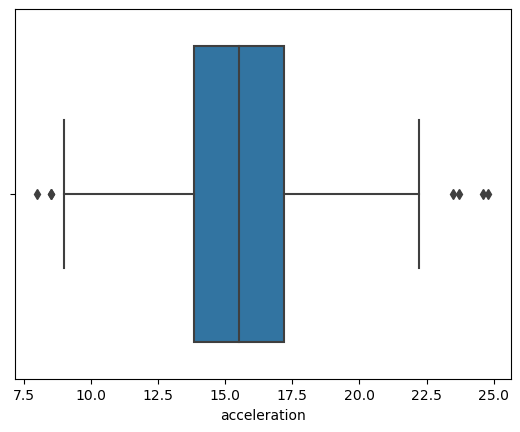

In [278]:
plt3 = sns.boxplot(new_df['acceleration'])
plt.show()

In [153]:
tmp = df.corr()
tmp

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


<AxesSubplot:>

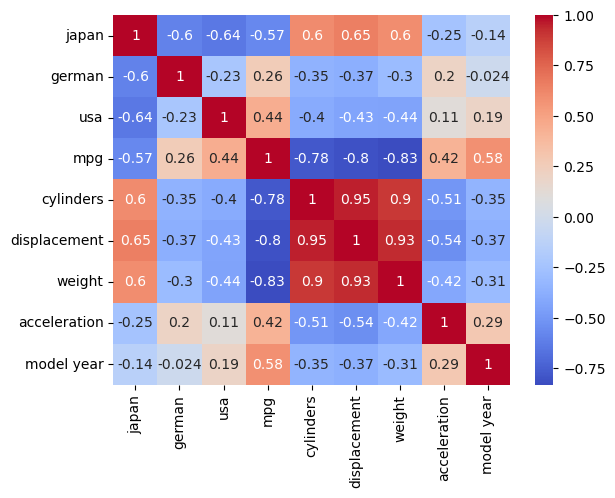

In [154]:
sns.heatmap(new_df.corr(),cmap='coolwarm',annot=True)

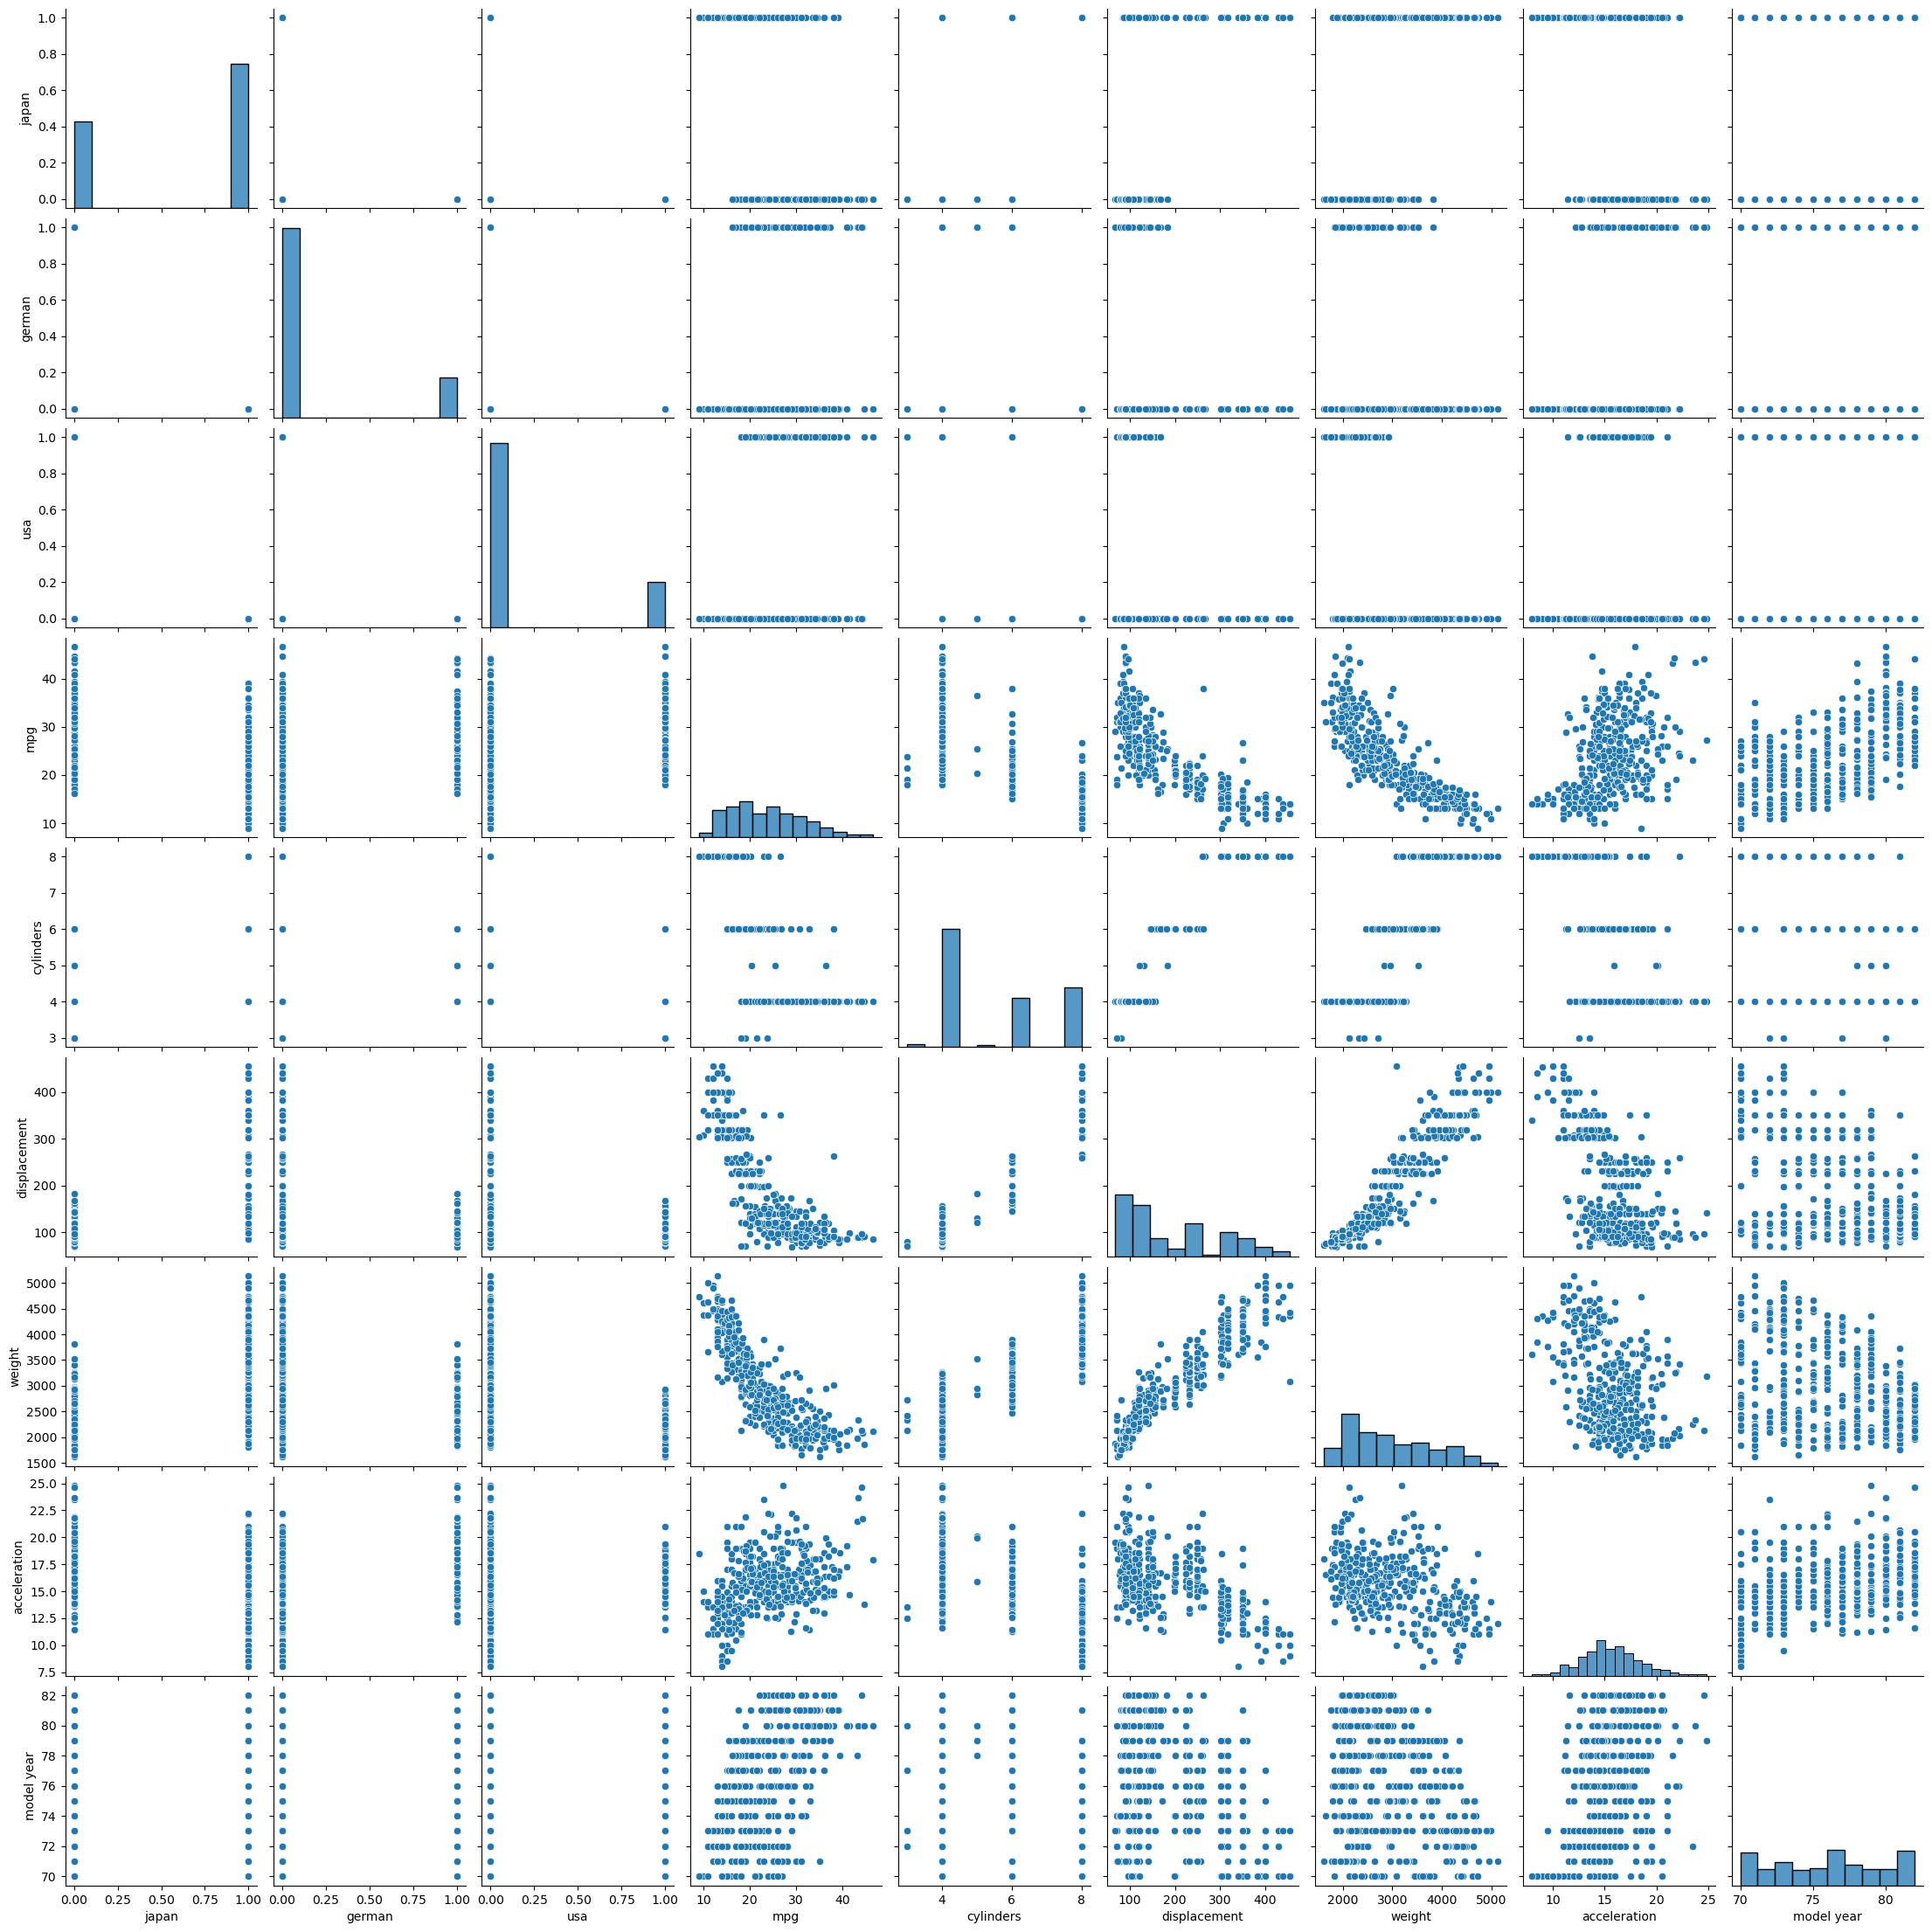

In [251]:
sns.pairplot(new_df)

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

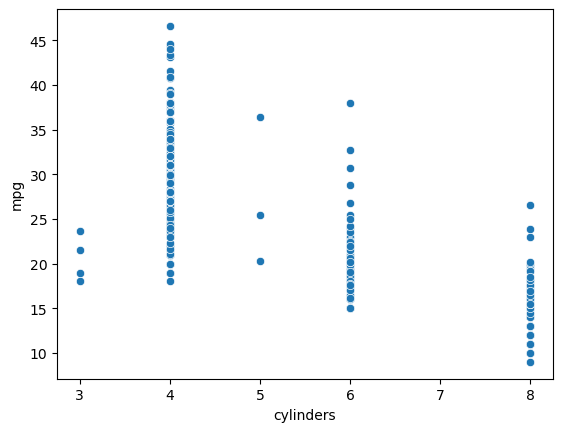

In [155]:
sns.scatterplot(x='cylinders',y='mpg',data=new_df)

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

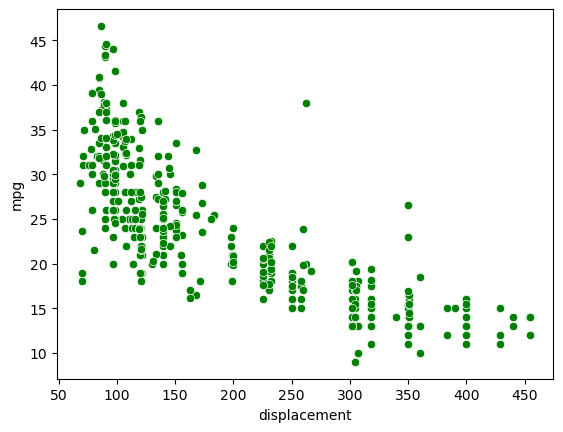

In [156]:
sns.scatterplot(x='displacement',y='mpg',data=new_df,color='green')

<AxesSubplot:xlabel='acceleration', ylabel='mpg'>

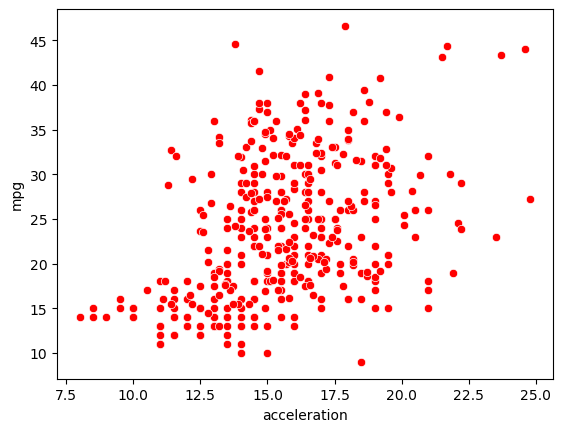

In [157]:
sns.scatterplot(x='acceleration',y='mpg',data=new_df,color='red')

In [193]:
x = new_df.drop(['mpg','horsepower'],axis=1).values
print(x)
x.dtype

[[1.000e+00 0.000e+00 0.000e+00 ... 3.504e+03 1.200e+01 7.000e+01]
 [1.000e+00 0.000e+00 0.000e+00 ... 3.693e+03 1.150e+01 7.000e+01]
 [1.000e+00 0.000e+00 0.000e+00 ... 3.436e+03 1.100e+01 7.000e+01]
 ...
 [1.000e+00 0.000e+00 0.000e+00 ... 2.295e+03 1.160e+01 8.200e+01]
 [1.000e+00 0.000e+00 0.000e+00 ... 2.625e+03 1.860e+01 8.200e+01]
 [1.000e+00 0.000e+00 0.000e+00 ... 2.720e+03 1.940e+01 8.200e+01]]


dtype('float64')

In [295]:
x_frame = pd.DataFrame(x)

In [281]:
print(x.dtype)

float64


In [282]:
y = new_df[['mpg']].values

In [283]:
sc = StandardScaler()
X = sc.fit_transform(x)
Y = sc.fit(y)

In [284]:
print(X)
print("------------------------------------------------")
print(Y)

[[ 0.          0.77355903 -0.46196822 ...  0.63086987 -1.29549834
  -1.62742629]
 [ 0.          0.77355903 -0.46196822 ...  0.85433297 -1.47703779
  -1.62742629]
 [ 0.          0.77355903 -0.46196822 ...  0.55047045 -1.65857724
  -1.62742629]
 ...
 [ 0.          0.77355903 -0.46196822 ... -0.79858454 -1.4407299
   1.62198339]
 [ 0.          0.77355903 -0.46196822 ... -0.40841088  1.10082237
   1.62198339]
 [ 0.          0.77355903 -0.46196822 ... -0.29608816  1.39128549
   1.62198339]]
------------------------------------------------
StandardScaler()


In [285]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [286]:
print("x test size",x_test.shape)
print("x train size",x_train.shape)
print("y test size",y_test.shape)
print("y train size",y_train.shape)

x test size (100, 9)
x train size (298, 9)
y test size (100, 1)
y train size (298, 1)


In [287]:
lr = LinearRegression()
model_linear = lr.fit(x_train,y_train)

In [288]:
Intercept=model_linear.intercept_
Coefficients=model_linear.coef_
print(Intercept)
print(Coefficients)

[-20.76857662]
[[ 0.         -1.86599014  0.64691887  1.21907127 -0.27470399  0.02162956
  -0.00717034  0.2979706   0.77519294]]


In [289]:
y_pred = model_linear.predict(x_test)
print("Linear model accuracy score: ",r2_score(y_test,y_pred))

Linear model accuracy score:  0.8230827917143397


In [299]:
X_1 = new_df
X_1 = X_1.drop(['mpg','horsepower'],axis=1).values

In [302]:
Y_1 = new_df[['mpg']].values

In [303]:
import statsmodels.api as ssm
X_1=ssm.add_constant(X_1)
X_1

array([[1.000e+00, 1.000e+00, 0.000e+00, ..., 3.504e+03, 1.200e+01,
        7.000e+01],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 3.693e+03, 1.150e+01,
        7.000e+01],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 3.436e+03, 1.100e+01,
        7.000e+01],
       ...,
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 2.295e+03, 1.160e+01,
        8.200e+01],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 2.625e+03, 1.860e+01,
        8.200e+01],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 2.720e+03, 1.940e+01,
        8.200e+01]])

In [305]:
lr = LinearRegression()
model_linear1 = lr.fit(X_1,Y_1)
model= ssm.OLS(model_linear1.predict(X_1),X_1).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.217e+26
Date:                Wed, 08 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:19:21   Log-Likelihood:                 10002.
No. Observations:                 398   AIC:                        -1.999e+04
Df Residuals:                     390   BIC:                        -1.996e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3051   2.75e-12   -5.2e+12      0.0

In [250]:
print("----------------------- Try example ----------------------------")
print("5.index real value: %.2f"%y_test[5])
print("5.index predict value: %.2f"%y_pred[5])
array1 = np.array(y_test)
array2 = np.array(y_pred)
subtracted_array = np.subtract(array1, array2)
subtracted = list(subtracted_array)
print("error values: %4f"%np.sum(subtracted))
differ = np.sum(subtracted)
std = np.std(y_test)
mse_manuel = differ/std
print("standard deviation %4f"%std)
print("result of manual mse %4f"%mse_manuel)

----------------------- Try example ----------------------------
5.index real value: 35.00
5.index predict value: 29.75
error values: 58.594069
standard deviation 7.903751
result of manual mse 7.413451


In [227]:
print("----------------------- Try another example ----------------------------")
print(y_test[14])
print(y_pred[14])

----------------------- Try another example ----------------------------
[15.5]
[16.13282822]


In [224]:
import math
print('Linear Regression:')
print('MSE Score: %.3f '% mean_squared_error(y_test, y_pred))
print('MAE Score: %.3f' % mean_absolute_error(y_test, y_pred))
MSE = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
print("Rmse Score:  %.3f " %RMSE)

Linear Regression:
MSE Score: 11.052 
MAE Score: 2.690
Rmse Score:  3.324 


In [306]:
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x_train,y_train)
x_poly

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.51880976e+06, 7.49792160e+06, 3.70150560e+07],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.28977424e+06, 9.20630880e+06, 3.70150560e+07],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.86786889e+06, 8.52957470e+06, 3.89500810e+07],
       ...,
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.02635225e+06, 7.58583150e+06, 2.83982410e+07],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.13422500e+06, 5.36866500e+06, 2.54116810e+07],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.53140625e+06, 6.96093750e+06, 3.16406250e+07]])

In [307]:
lin_reg2 = LinearRegression()
lin_reg2 = lin_reg2.fit(x_poly,y_train)

In [308]:
print("Poly OLS")
model2 = sm.OLS(lin_reg2.predict(poly_reg.fit_transform(x_train)),x_train)
print(model2.fit().summary())

Poly OLS
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Wed, 08 Mar 2023   Prob (F-statistic):          8.85e-109
Time:                        01:26:08   Log-Likelihood:                -764.85
No. Observations:                 298   AIC:                             1546.
Df Residuals:                     290   BIC:                             1575.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.6012      3.397     -4.593

In [317]:
print("Poly regression accuracy r2 score %4f"%r2_score(lin_reg2.predict(poly_reg.fit_transform(x_train)),y_train))

Poly regression accuracy r2 score 0.975826
